# Week 9: Regressiemodellen in Machine Learning

## Bibliotheken importeren

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

## Data inlezen en kolommen selecteren

In [2]:



file_path = "data/raw/titanic.csv"  
df = pd.read_csv(file_path, sep=';')  

# Bekijk de kolomnamen
print(df.columns.tolist())

# Selecteer de gewenste kolommen
df = df.loc[:, ['Pclass', 'Sex', 'Age']]
print(df)

['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Age', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
     Pclass     Sex  Age
0         3    male   22
1         1  female   38
2         3  female   26
3         1  female   35
4         3    male   35
..      ...     ...  ...
886       2    male   27
887       1  female   19
888       3  female   15
889       1    male   26
890       3    male   32

[891 rows x 3 columns]


In [13]:

print(df.columns.tolist())

['Pclass', 'Sex', 'Age']


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [14]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['Sex']])
dummies_dataframe

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [15]:
df = pd.concat([df, dummies_dataframe], axis = 1)
df = df.drop(['Sex'], axis = 1)
df = df.loc[:, ['Pclass', 'Sex_female', 'Sex_male', 'Age']]
df

,Pclass,Sex_female,Sex_male,Age
0,3,False,True,22
1,1,True,False,38
2,3,True,False,26
3,1,True,False,35
4,3,False,True,35
...,...,...,...,...
886,2,False,True,27
887,1,True,False,19
888,3,True,False,15
889,1,False,True,26


## Verticaal en horizontaal snijden

In [16]:
X = df.loc[df['Age'].notna(), :]
X = X.drop('Age', axis = 1)
y = df.loc[df['Age'].notna(), ['Age']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      891 non-null    int64
 1   Sex_female  891 non-null    bool 
 2   Sex_male    891 non-null    bool 
dtypes: bool(2), int64(1)
memory usage: 15.7 KB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
)

## Regressiemodel bouwen

In [18]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [19]:
y_pred= reg_model.predict(X_test)
y_pred

array([[30.66495956],
       [35.33564208],
       [30.66495956],
       [31.35184078],
       [26.68115827],
       [36.0225233 ],
       [26.68115827],
       [30.66495956],
       [26.68115827],
       [36.0225233 ],
       [40.00632459],
       [30.66495956],
       [26.68115827],
       [30.66495956],
       [35.33564208],
       [36.0225233 ],
       [40.00632459],
       [26.68115827],
       [35.33564208],
       [40.00632459],
       [30.66495956],
       [40.00632459],
       [26.68115827],
       [30.66495956],
       [30.66495956],
       [30.66495956],
       [40.00632459],
       [35.33564208],
       [30.66495956],
       [26.68115827],
       [30.66495956],
       [26.68115827],
       [40.00632459],
       [26.68115827],
       [30.66495956],
       [30.66495956],
       [40.00632459],
       [26.68115827],
       [36.0225233 ],
       [30.66495956],
       [35.33564208],
       [30.66495956],
       [30.66495956],
       [30.66495956],
       [26.68115827],
       [30

In [20]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_Age'})
prediction_df

,Predicted_Age
0,30.664960
1,35.335642
2,30.664960
3,31.351841
4,26.681158
...,...
129,30.664960
130,26.681158
131,30.664960
132,35.335642


In [21]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['Age'], prediction_df], axis = 1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_Age'].notna(), :]

,Age,Predicted_Age
0,27,30.664960
1,31,35.335642
2,20,30.664960
3,6,31.351841
4,36,26.681158
...,...,...
129,21,30.664960
130,54,26.681158
131,42,30.664960
132,31,35.335642


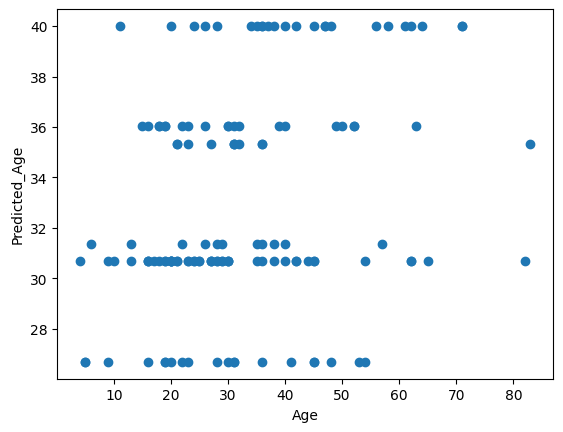

In [23]:
plt.scatter(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])
plt.xlabel('Age')
plt.ylabel('Predicted_Age')
plt.show()

In [24]:
mean_squared_error(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])

234.41710384183017

In [25]:
mean_absolute_error(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])

12.12762735544931